In [1]:
import copy
import numpy as np

from numpy.random import shuffle
from numba import njit
import matplotlib.pyplot as plt
from tqdm import tqdm

import funcs as f
import utils as utl

In [2]:
@njit
def indicator(k, k_, scale):
    if k != k_:
        return scale
    else:
        return 0

In [3]:
#@njit
def init_g2(img, labeling, a_i, scale):
    h, w = img.shape[:2]
    img = img.flatten()

    g = np.zeros((h*w + 2, h*w + 2), dtype = np.int32)

    g[0, 1:-1] = np.abs( a_i - img)
    g[1:-1, -1] = np.abs( labeling - img)

    for i in range(h):
        for j in range(w):
            index = j + i*w + 1
            # left
            if j > 0:
                left = j - 1 + i*w + 1
                g[index, left] = indicator( labeling[index-1], labeling[left-1], scale )
            # right
            if j < w - 1:
                right = j + 1 + i*w + 1
                g[index, right] = indicator( labeling[index-1], labeling[right-1], scale )
            # up
            if i > 0:
                up = j + (i-1)*w + 1
                g[index, up] = indicator( labeling[index-1], labeling[up-1], scale )
            # down
            if i < h - 1:
                down = j + (i+1)*w + 1
                g[index, down] = indicator( labeling[index-1], labeling[down-1], scale )
                
    return g

Input size:  (16, 16)
dtype: uint8 | max: 216 | min: 46


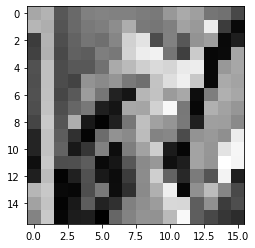

In [4]:
C = np.array([1, 128, 255])
repeats = 1
shape = (16,16)
img = utl.import_img("input.png", bw=True, newshape=shape)

---

## Main

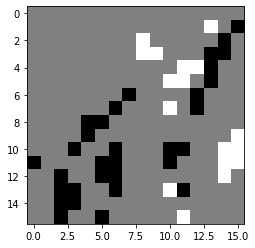

In [5]:
# Initial labeling
k_init = f.initial_labeling(img, C)
plt.imshow(np.reshape(k_init, shape), cmap='gray')

plt.subplots(figsize=(20, 20))
plt.imshow(g, cmap='gray')

In [6]:
a_shuffle = np.copy(C)
shuffle(a_shuffle)
a_i = a_shuffle[0]
a_i

255

In [7]:
labeling = k_init
g = init_g2(img, labeling, a_i, scale=100)

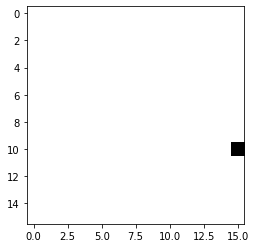

In [8]:
res = f.Ford_Falkerson(img, g)
plt.imshow(np.reshape(res, shape), cmap='gray')

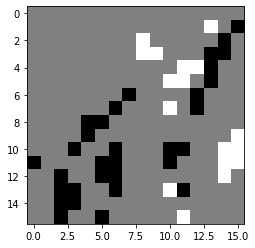

In [9]:
labeling = f.translate_to_labeling(res, labeling, a_i)
plt.imshow(np.reshape(labeling, shape), cmap='gray')

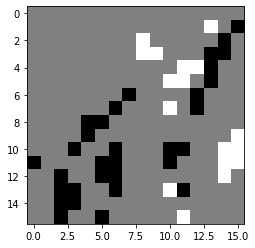

In [10]:
plt.imshow(np.reshape(k_init, shape), cmap='gray')

In [11]:
Vsize = 16*16
o = np.zeros(Vsize+2)
im = np.zeros(Vsize)
o.shape, im.shape

((258,), (256,))

In [12]:
Vsize+1

257

In [13]:
o[Vsize+1]

0.0

labeling = np.copy(k_init)
for repeats in tqdm(range(repeats)):
    
    # Shuffle
    a_shuffle = np.copy(C)
    shuffle(a_shuffle)
    
    for i in range(a_shuffle.size):

        # a_i
        a_i = a_shuffle[i]
        
        # g init
        g = init_g2(img, labeling, a_i, scale=100)
        print(i)
        
        # Ford-Falkerson
        res = f.Ford_Falkerson(img, g)
        labeling = f.translate_to_labeling(res, labeling, a_i)